# A Look Into Polycystic Ovarian Syndrome (PCOS)
This is the first part of this project analyzing **Polycystic Ovarian Syndrome (PCOS)**. This notebook focuses on the hormones that affect PCOS, with clinical data from 10 hospitals in Kerala, India. 

### Why This Project? 
As per the [Center for Disease Control and Prevention (CDC)](https://www.cdc.gov/diabetes/basics/pcos.html#:~:text=What%20is%20PCOS%3F,beyond%20the%20child%2Dbearing%20years.), Polycystic Ovarian Syndrome (PCOS) affects 6-12% of all reproductive-aged women worldwide, and is one of the most common reasons for infertility. Though it is widely prevalent, it is also extremely under-researched, with no known underlying cause. With this project (as a whole), I aim to get an understanding of the hormonal/physiological aspects of PCOS (notebook 1), as well as get an understanding of the experiences that those with PCOS undego while living with the disorder. 

### Goal (this notebook): 
Analyze the dataset provided, and build a binary classifier that can tell whether or not someone will have PCOS. To do this, I will fit the data to multiple different classifiers, and identify which has the better accuracy. Building this classifier, and the information behind the dataset, will help in understanding how the information in the dataset can be used to determine if a patient has PCOS. 

### Data Source
The data was found on Kaggle, [here](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos) <br>
__Author:__ Prasoon Kottarathil <br>
__Title:__ Polycystic ovary syndrome (PCOS) <br>
__Year:__ 2020 <br>
__Publisher:__ Kaggle <br>
__Journal:__ Kaggle Dataset <br>


### Skills Used
* Python Programming 
* Exploratory Data Analysis (EDA)
* Numpy/Pandas
* Binary Classification and Classifier Comparison (Using Scikit-Learn)
* Visualization (using MatPlotLib and Seaborn)

## Part 1: Overview of PCOS

### What is PCOS?
Polycystic Ovarian Syndrome (PCOS) is a heterogenous disorder, involving the biologically female reproductive and endocrine health. While the name allows for the presumption that the main characteristic is multiple cysts on the ovaries, this symptom is not shown in many cases. The overall cause for this disorder is unknown. 

While the overall cause for the disorder is unknown, there are thought to be 4 general types of POCS: 
1. **Insulin-resistant PCOS**: The body does not respond well to insulin, causing the pancreas to produce more insulin to try and compensate. This can result into increased levels of androgens in the body (more in the "Treatment" section). This is the most common type of PCOS. 
2. **Inflammatory PCOS**: Those with this kind of PCOS experience high levels of inflammation in the body, which stimulates the ovaries to produce more androgens, interfering with ovulation
3. **Adrenal PCOS**: This type of PCOS is driven by the body's response to stress. A high amount of stress can cause heightened DHEA levels, increasing androgen production from the adrenal glands. 
4. **Pill-Induced PCOS**: This type of PCOS comes after stopping contraceptive pills, because the androgens are starting to rise back to normal levels after being surpressed. This type of PCOS is usually healed within a year or less. 

Because the hormones generally associated with PCOS can affect each other, it is common for PCOS patients to have a combination of two or more types. 

### Signs and Symptoms
Some common signs and symptoms of PCOS include: 
* Irregular menstrual cycles
* Hirsutism
* Insulin Resistance
* Acne
* Male-pattern balding
* Pelvic pain 
* Low libido

Note that these signs and symptoms are based on the underlying hormone imbalances, depending on which hormones have irregular levels.

### Diagnosis 
PCOS diagnosis is based on 3 criteria, known as the __Rotterdam Criteria__:
1. Irregular ovulation 
2. Heightened androgen levels
3. Cysts on ovaries

A diagnosis requires 2 of the 3 above requirements to be fulfilled. <br>

While the Rotterdam Criteria is the most widely used by clinicians for diagnosis, there are also the **NICHD/NIH Criteria** and the **Androgen Excess Society's Criteria**. These two criteria models are very similar to the Rotterdam criteria, with the main difference being an emphasis on ruling out any other possible disorders that can present themselves similar to how PCOS presents. 

### Treatment
Because the underlying cause of PCOS is unknown, treatment is heavily based on healing the symptoms, especially heightened androgens and insulin resistance, since they are known to be heavily connected. Heightened androgen levels (***hyperandrogenism***) can inhibit follicular development, ovarian microcysts, and menstrual irregularities, including anovulation. Hyperandrogenism can be aggrevated by insulin resistance, as excess insulin promotes ovarian androgen production. 

The following are some common treatment options for PCOS symptoms: <br> 
- ***Anti-diabetic agents***: With insulin resistance, there is a heightened risk of pre-diabetes and type II diabetes. 
- ***Anti-androgenic agents***: Insulin resistance can cause the ovaries to produce excess androgens, causing irregularities in the menstrual cycle, and causing outward changes to the body (including hirsutism, acne-prone/oily skin, and more). Anti-androgenic agents can help reduce the affects the excess androgens have on the body. 


## Part 2: Data Cleaning and EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
pcos_inf = pd.read_csv('PCOS_infertility.csv')
pcos_no_inf = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name = 'Full_new')

In [5]:
pcos_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [6]:
pcos_no_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,1.99,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [7]:
df = pd.merge(pcos_no_inf,pcos_inf, on='Patient File No.', suffixes={'','_y'},how='left')
df.head()

/var/folders/fg/1_23q2h17818_h8762mhhl540000gn/T/ipykernel_1400/2783449098.py:1: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df = pd.merge(pcos_no_inf,pcos_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,1.99,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.to_csv('pcos_full_data_inf.csv', index = False) #to save the full dataset 

In [9]:
#Look at list of columns to see if there are duplicates: 
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'],
     

In [10]:
#drop the duplicate columns: 
df = df.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)
df.shape

(541, 44)

In [11]:
#Looking at the data, I can tell that all of the columns should be some form of numeric (int or float)
#Let's check this:
df.dtypes

Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [12]:
#There are two columns that are object type- let's check them out 
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors = 'coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors = 'coerce')

In [13]:
#check again to make sure they worked: 
df.dtypes

Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [14]:
#It worked!
#Now I want to check on null values: 
df.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [15]:
#Because there are only 4 null values (AMH and beta-HCG), I think I will just drop those values
#Some other options: fill in the null vals with the median, or fill them in with the mean
df.dropna(inplace = True)

In [16]:
df.shape

(537, 44)

##### Now there is all numerical data, I can go and do some EDA
First, I will look at the basic statistics of the columns:

In [17]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,271.070764,271.070764,0.325885,31.435754,59.680633,156.492171,24.327726,13.800745,73.249534,19.238361,11.161229,2.556797,4.938547,7.694041,0.383613,0.290503,668.454052,239.992717,14.687060,6.506454,6.911256,37.983240,33.832402,0.891868,2.963302,5.596635,24.410279,50.086197,0.612069,99.879330,0.378026,0.273743,0.305400,0.452514,0.491620,0.515829,0.243948,114.659218,76.960894,6.113594,6.635009,15.008939,15.445754,8.469963
std,156.475961,156.475961,0.469141,5.406608,11.028685,6.041379,4.059454,1.845567,4.445894,1.689238,0.869186,0.900371,1.494375,4.809257,0.486719,0.694705,3361.033646,1609.668674,217.828075,86.994837,60.917136,3.965064,3.602165,0.046278,3.726338,5.865940,14.972018,347.489852,3.822943,18.619041,0.485346,0.446294,0.461006,0.498204,0.500396,0.500215,0.429862,7.374148,5.569134,4.226796,4.443774,3.568414,3.325234,2.160065
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.990000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,10.500000,2.000000,4.000000,4.000000,0.000000,0.000000,1.990000,1.990000,3.340000,1.030000,1.416244,36.000000,32.000000,0.857143,1.480000,2.010000,14.520000,20.700000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.600000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.000000,7.000000,0.000000,0.000000,20.000000,1.990000,4.860000,2.300000,2.161172,38.000000,34.000000,0.894737,2.260000,3.700000,21.920000,26.000000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.666667,15.000000,74.000000,20.000000,11.800000,4.000000,5.000000,10.000000,1.000000,0.000000,297.210000,99.690000,6.420000,3.680000,3.871287,40.000000,36.000000,0.928571,3.570000,6.900000,29.970000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.000000,30.000000,1.000000,5.000000,32460.970000,25000.000000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,66.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000

In [18]:
list(df.columns)

['Sl. No',
 'Patient File No.',
 'PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [19]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,1.99,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [20]:
#df.to_csv('pcos_full_clean.csv', index = False)

Because there are a few features that I have not seen before in my day-to-day life, I want to look into them more, and see how they relate to PCOS. Below are those features, and what I found about their relation to PCOS, according to journal articles and other reputable sources:  
- __BMI__ (Body Mass Index)  
    - Calculated using the following formula: $weight$ / $height^{2}$, where $weight$ is measured in kilograms, and $height$ is measured in meters. It is commonly used to indicate body fat amount, with a higher BMI indicating potential obesity. It should be noted, however, that BMI does *not* take into account muscle mass.  
    - For unclear reasons, a large portion of patients with PCOS are insulin resistant, and this insulin resistance can potentially be worsened when accompanied by weight gain (a higher BMI). (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6734597/#:~:text=Data%20from%20the%20Northern%20Finland,of%20PCOS%20at%20all%20ages.&text=Furthermore%2C%20modest%20weight%2Dloss%20(,and%20metabolic%20features%20of%20PCOS.) ) 
- __Cycle Length__ (days)
    - How long each participants' menstruation cycle tends to be
    - In women with PCOS, if they do experience a menstruation cycle, it is common for the lengths to be irregular, whether that means that the cycle is abnormally long, short, or not consistent. (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5542050/) 
- __I and II beta-HCG__ (Human Chorionic Gonadotropin)
    - Hormones that are primarily created during pregnancy in the placenta, and stimulates the corpus luteum to produce progesterone. Lack of progesterone can lead to the inability of the uterine lining to shed, as it sheds as the result of a drop of progesterone levels. If there is lacking progesterone, there will not be enough of a drop to trigger shedding. (link: https://www.ncbi.nlm.nih.gov/books/NBK532950/)
- __Follicle Stimulating Hormone (FSH) and Luteal Hormone (LH)__ (use FSH/LH ratio)
    - FSH is a hormone produced by the anterior pituitary gland, as a response to the hypothalamus releasing gonadotropin-releasing hormone (GnRH), and plays a role in the sexual development of both males and females.(link: https://www.ncbi.nlm.nih.gov/books/NBK535442/)
    - LSH is a hormone released alongside FSH by the anterior pituitary, and triggers the release of steroid hormones from the ovaries in women. It also assists in regulating the length and order of the menstruation cycle, playing a role in both ovulation and egg implantation. (link: https://www.ncbi.nlm.nih.gov/books/NBK539692/)  
    - The ratio of LH to FSH is usually between 1 and 2. In those with PCOS, this ratio is commonly heightened, and can reach up to 2 or 3 (that is, the LH levels can be heightened or the FSH levels can be low). Heightened LH:FSH ratios can lead to anovulation in those who have PCOS. (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7520057/#:~:text=Usually%2C%20in%20healthy%20women%2C%20the,ovary%20disease%20patients%20(9).)
- __Thyroid Stimulating Hormone__ (TSH)
    - Glycoprotein hormone produced by the anterior pituitary gland, responsible for stimulating the production of the thyroid hormones (T3 and T4) by the thyroid gland. (link: https://www.ncbi.nlm.nih.gov/books/NBK499850/)
    - In the case of primary hypothyroidism, prolactin and TSH can increase, which have an affect on the LSH/FH ratio.(link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4287775/)  
- __Vitamin D3__
    - "Vitamin D plays a physiologic role in reproduction including ovarian follicular development and luteinization via altering anti-müllerian hormone (AMH) signalling, follicle-stimulating hormone sensitivity and progesterone production in human granulosa cells" (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4669857/)
    - Somewhere between 67-85% of women with PCOS have a vitamin D deficiency, with the deficiency making PCOS symptoms (including insulin resistance, menstrual irregularities, hyperandrogenism, and more) worse. (link: same as above) 
- __AMH__ (Anti-Muellerian Hormone)
    - AMH is a hormone released by the granulosa cells of the small, growing follicles in the ovaries. They are commonly used to determine the ovarian reserve (ie, the amount of quality eggs produced) (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7486884/#:~:text=Context,a%20marker%20for%20ovarian%20reserve.)
    - Those with PCOS can have AMH levels 2-to-3 times higher than those who are healthy and are in childbearing age (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8006968/#:~:text=AMH%20is%20secreted%20by%20the,follicular%20mass%20or%20follicular%20hypersecretion.) 
- __PRL__ (Prolactin)
    - Prolactin is a hormone composed of 199 amino acids, secreted from the anterior pituitary, central nervous system, the uterus, and the mammary glands. It is responsible for hundreds of actions that maintain homeostasis, including breast development and lactation. (link: https://www.ncbi.nlm.nih.gov/books/NBK507829/#:~:text=Prolactin%20is%20a%20polypeptide%20hormone,hormone%20and%20placental%20lactogen%20hormone.)
    - Those with PCOS can show higher levels of prolactin, which can result in a reduction of ovarian follicles, potentially causing anovulation (link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8689332/) 
- __PRG__ (Progesterone)
    - Hormone produced in the adrenal cortex and in the ovaries and testes. In biologically female bodies, progesterone is important during pregnancy to keep the uterus growing, and to prevent contractions. A lowered amount of progesterone can lead to decreased fertility, heightened risk of miscarriage, and/or miscarriage or early labor.
    - Women with PCOS often experience a decreased amount of progesterone production (link: https://www.ncbi.nlm.nih.gov/books/NBK558960/) 
- __RBS__ (Random Glucose Test)
    - A blood glucose test administered at any time of day, regardless of whether the patient has eaten or not. Blood glucose over 200 mg/dL may be an indicator of diabetes. (link: https://www.cdc.gov/diabetes/basics/getting-tested.html)
        - Those with PCOS are at higher risk of developing diabetes, due to insulin resistance. 

I believe that, while all of these hormones are important when discussing PCOS, one hormone is not represented: __testosterone__ (see "Discussion" section for explanation). 

As seen by the above descriptions, many of the features of interest rely on each other in their action mechanisms. Because of this, we can assume that there should be some correlation in the data for these features. To check this assumption, I will create a correlation matrix:

<AxesSubplot:>

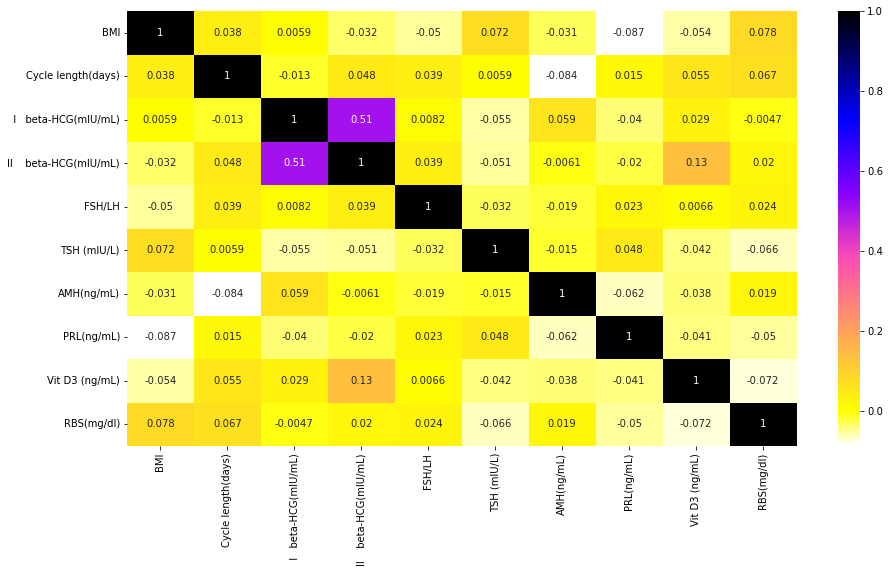

In [21]:
import seaborn as sns
plt.figure(figsize=(15,8))
no_pcos_df = df[df['PCOS (Y/N)'] == 0.0]
yes_pcos_df = df[df['PCOS (Y/N)'] == 1.0]

interests_df1 = no_pcos_df[['BMI', 'Cycle length(days)', '  I   beta-HCG(mIU/mL)', 
                  'II    beta-HCG(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 
                  'Vit D3 (ng/mL)', 'RBS(mg/dl)']]
interests_df2 = yes_pcos_df[['BMI', 'Cycle length(days)', '  I   beta-HCG(mIU/mL)', 
                  'II    beta-HCG(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 
                  'Vit D3 (ng/mL)', 'RBS(mg/dl)']]
corr = interests_df1.corr()

#Heatmap of pertaining to the participants who do not have PCOS:
sns.heatmap(corr, cmap="gnuplot2_r", annot=True)

<AxesSubplot:>

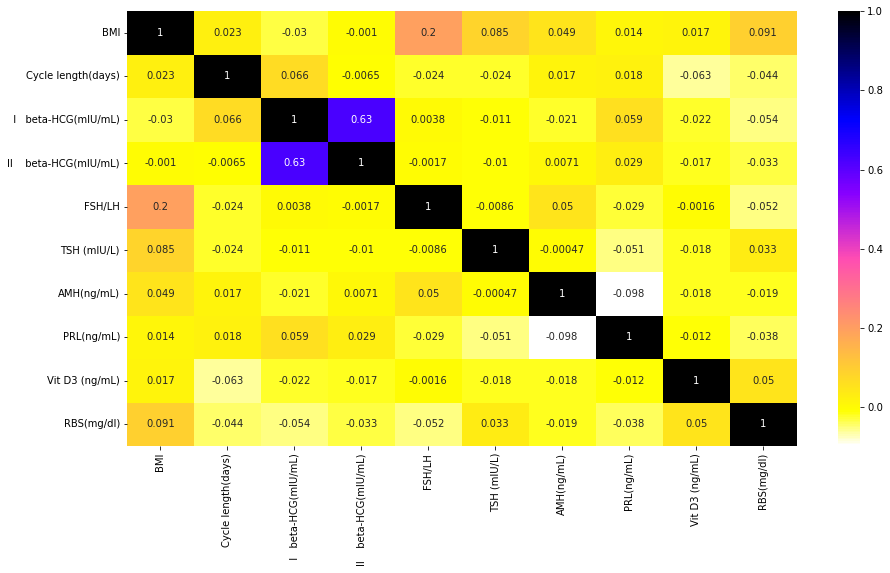

In [22]:
#heatmap of the participants who do have PCOS:
plt.figure(figsize=(15,8))
corr2 = interests_df2.corr()
sns.heatmap(corr2, cmap="gnuplot2_r", annot=True)

<AxesSubplot:>

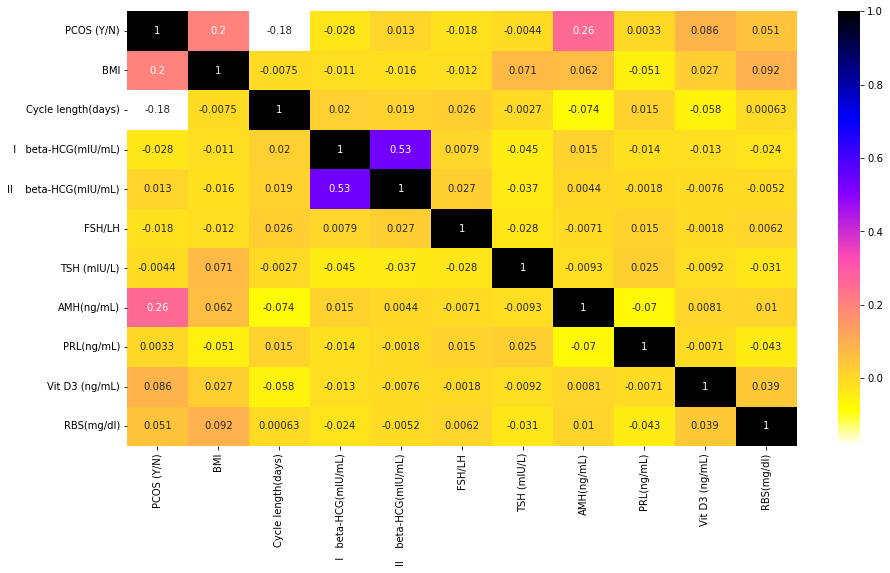

In [23]:
#Heatmap containing all participants:
plt.figure(figsize=(15,8))
interests_df3 = df[['PCOS (Y/N)','BMI', 'Cycle length(days)', '  I   beta-HCG(mIU/mL)', 
                  'II    beta-HCG(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 
                  'Vit D3 (ng/mL)', 'RBS(mg/dl)']]
corr3 = interests_df3.corr()
sns.heatmap(corr3, cmap="gnuplot2_r", annot=True)

When looking at the correlation matrices above, there doesn't seem to be any extremely-strong correlations between features, except for the I and II beta-HCGs. Tould be caused by the smaller amount of data that we have available in each sub-dataframe used for each. Because of this, I further analyze these matrices in a relative manner, mostly taking into account whether the correlation values are positive or negative. <br>

In terms of the correlation between PCOS and the features, it seems that PCOS has the larger, positive correlation with BMI and the anti-Mullerian hormone (AMH). [This correlation has been found to be true in study.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8006968/) 

Because I could only make assumptions based on the positive or negative signs (due to the lack of data), I will look into the entire dataframe as a whole, to see if I can find any more obvious correlations. This time, I will also look at all of the features, instead of just the selected few from earlier. 

<AxesSubplot:>

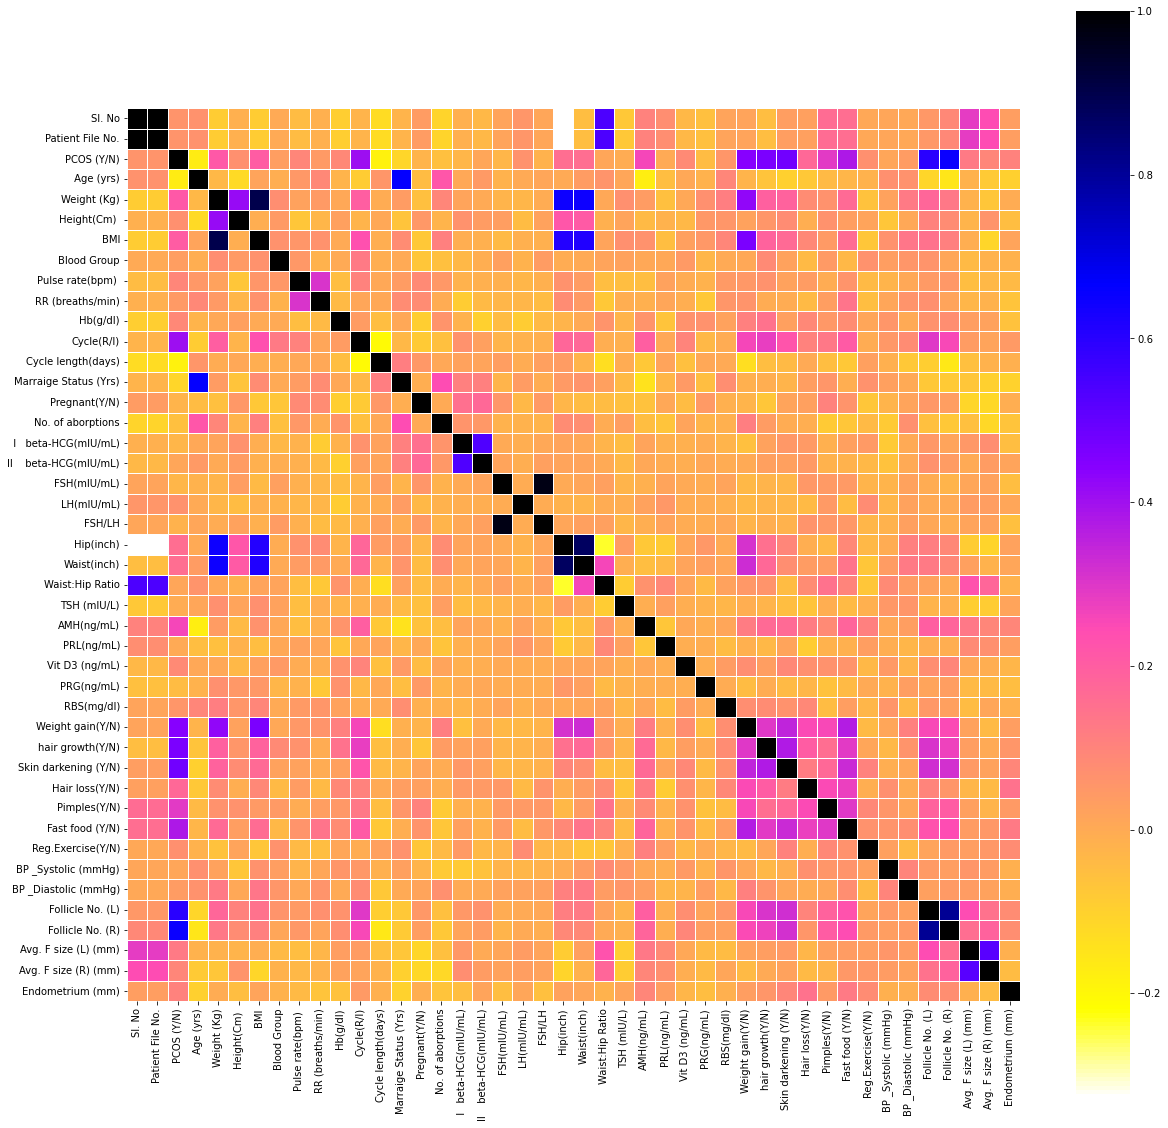

In [52]:
#heatmap of all data, all columns:
fig, ax = plt.subplots(figsize=(20,20))
corr4 = df.corr()
g = sns.heatmap(corr4, cmap="gnuplot2_r", linewidth=.5, square = True, ax = ax)
g

Based on the coloring alone, I can already tell that I will be able to make better insights with the entire dataframe being taken into account. <br> 

The first distinct purple (positive correlation) pattern that can be seen is the sqaure towards the bottom right of the matrix. These positively-correlated features include the following (note that they are all binary): weight gain (y/n), hair growth (y/n), skin darkening (y/n), hair loss (y/n), pimples (y/n), and fast food (y/n). These binary features are also positively correlated with PCOS, and have the highest correlation with PCOS out of all of the features. ***Why could this be?***  These binary features (aside from fast food) are all commonly correlated with each other, with the underlying cause being testosterone and insulin resistance, which is common in those with PCOS. Fast food can aggrevate these features, especially when eaten on a regular basis. <br> 

Another interesting correlation to note is the highly positive correlation between FSH and the FSH/LH ratio. While there is a highly positive correlation between the two, there is a correlation value closer to 0 (no detectable correlation) between the FSH/LH ratio and LH. ***Why could this be?*** In many with PCOS, it is common to see a high LH value. Because our data contains data for both patients with PCOS and patients without PCOS, it is possible that there is a mix of LH values that can make the correlations less noticable. <br> 


## Part 3: Classification 

For classification, I will try a few different classifiers that are common in classification and see which retain better results. Namely, I will use: ***Random Forest, K-Nearest Neighbors, Logistic Regression, Naive bayes, and Decision Tree***. I will not be using Support Vector Machine, as it generally does not perform well on imbalanced data. For evaluation, I will use F1 scoring, as it works best for imbalanced data.

In [53]:
#check for the balance of data:
y_pcos = len(df[df['PCOS (Y/N)'] == 1.0])
n_pcos = len(df[df['PCOS (Y/N)'] == 0.0])
y_pcos, n_pcos

(175, 362)

In [54]:
df1 = df.copy()
y = df1['PCOS (Y/N)']
X = df1.drop(columns = ['PCOS (Y/N)'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.18, random_state=42)

In [56]:
#Types of classifiers to use: Random Forest, K-Nearest Neighbors, Support Vector Machine (SVC), Logistic Regression,
#Naive Bayes, Decision Tree Classifier

#Random Forest:
rcf = RandomForestClassifier(random_state = 42)
rcf.fit(X_train, y_train)
rcf_pred = rcf.predict(X_test)
rcf_acc = accuracy_score(rcf_pred, y_test)
rcf_acc

0.9072164948453608

In [57]:
#Logistic Regression:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 42) #have to set a higher max_iter, otherwise it won't converge
log_reg.fit(X_train, y_train)
lr_pred = log_reg.predict(X_test)
lr_acc = accuracy_score(lr_pred, y_test)
lr_acc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8969072164948454

In [66]:
# #K-Nearest Neighbors Classifier:
# kn_class = KNeighborsClassifier()
# kn_class.fit(X_train, y_train)
# knc_pred = kn_class.predict(X_test) 
# kn_acc = accuracy_score(knc_pred, y_test) 
# kn_acc

In [60]:
#(Gaussian) Naive Bayes: 
nb_c = GaussianNB()
nb_c.fit(X_train, y_train)
nbc_pred = nb_c.predict(X_test)
nbc_acc = accuracy_score(nbc_pred, y_test)
nbc_acc

0.8247422680412371

In [62]:
#Decision Tree: 
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) 
dtc_pred = dtc.predict(X_test) 
dtc_acc = accuracy_score(dtc_pred, y_test)
dtc_acc

0.8762886597938144

In [63]:
l = [('K Nearest', KNeighborsClassifier()), ('RF', RandomForestClassifier()), ('Naive', GaussianNB())]
l

[('K Nearest', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('Naive', GaussianNB())]

In [67]:
#using f1 score (f1 is best for uneven class distribution):
def classifications(X, y, testsize, max_it, rand_state = 42): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= testsize, random_state=rand_state)
    l = [#('K-Nearest Neighbors', KNeighborsClassifier()), 
         ('Random Forest', RandomForestClassifier(random_state = rand_state)), 
         ('Decision Tree', DecisionTreeClassifier(random_state = rand_state)),
         ('Naive Bayes', GaussianNB()), 
         ('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter= max_it, random_state = rand_state))] 
    acc_dict = {}
    for classifier in l: 
        c = classifier[1]
        c.fit(X_train, y_train)
        c_pred = c.predict(X_test)
        c_acc = f1_score(c_pred, y_test)
        acc_dict[classifier[0]] = c_acc
    return acc_dict

In [68]:
#classifications matching what was done previously:
og_class = classifications(X,y, 0.18, 1000)
og_class

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.8363636363636363,
 'Decision Tree': 0.7333333333333333,
 'Naive Bayes': 0.7733333333333334,
 'Logistic Regression': 0.8333333333333334}

In [69]:
#change the test size to 0.33:
third_testing = classifications(X, y, 0.33, 1000)
third_testing

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.7755102040816326,
 'Decision Tree': 0.6548672566371682,
 'Naive Bayes': 0.676056338028169,
 'Logistic Regression': 0.75}

To make things easier when testing different testing data sizes, I will loop through a list of potential testing sizes and create a dictionary with the sizes as the keys, and the resulting classifications dictionaries as the values

In [70]:
diff_test_size_dict = {} 
testing_sizes = [0.1, 0.18, 0.2, 0.25, 0.33]
for size in testing_sizes: 
    clf = classifications(X, y, size, 5000)
    diff_test_size_dict[str(size * 100)] = clf
diff_test_size_dict

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'10.0': {'Random Forest': 0.8125000000000001,
  'Decision Tree': 0.6486486486486486,
  'Naive Bayes': 0.8292682926829269,
  'Logistic Regression': 0.823529411764706},
 '18.0': {'Random Forest': 0.8363636363636363,
  'Decision Tree': 0.7333333333333333,
  'Naive Bayes': 0.7733333333333334,
  'Logistic Regression': 0.793103448275862},
 '20.0': {'Random Forest': 0.806451612903226,
  'Decision Tree': 0.7272727272727273,
  'Naive Bayes': 0.7529411764705882,
  'Logistic Regression': 0.7692307692307693},
 '25.0': {'Random Forest': 0.7848101265822784,
  'Decision Tree': 0.702127659574468,
  'Naive Bayes': 0.7378640776699029,
  'Logistic Regression': 0.7777777777777778},
 '33.0': {'Random Forest': 0.7755102040816326,
  'Decision Tree': 0.6548672566371682,
  'Naive Bayes': 0.676056338028169,
  'Logistic Regression': 0.7706422018348623}}

### Comparing Classifiers
In order to compare classifiers, it may be easier to use a visualization. In this case, I will use a bar graph: 

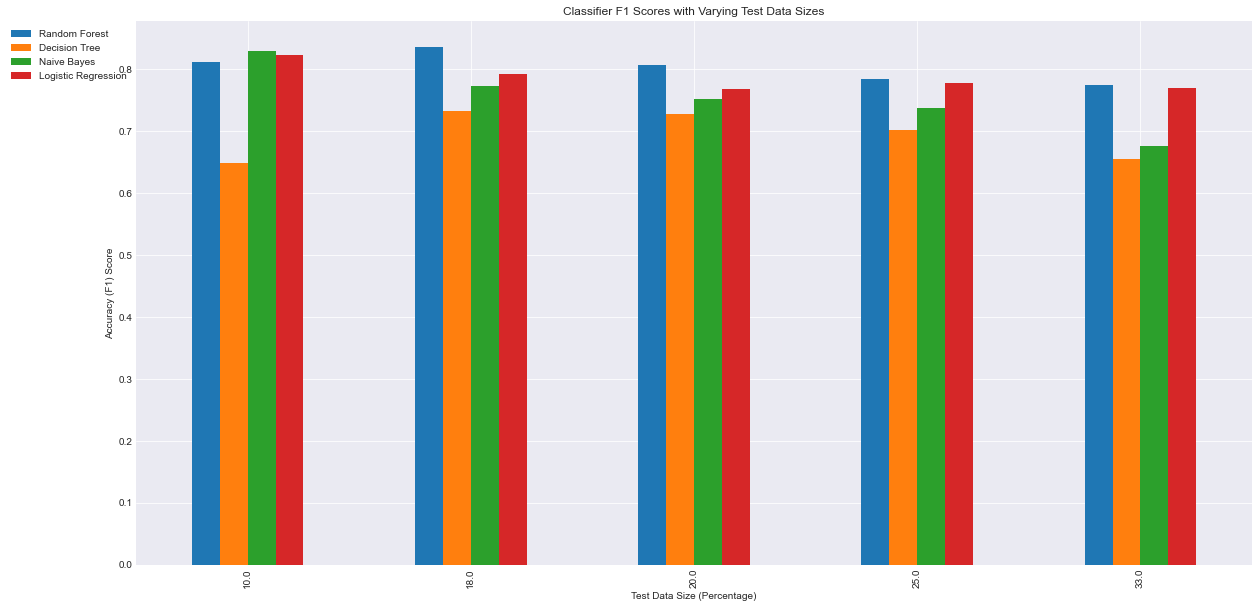

In [71]:
class_df = pd.DataFrame(diff_test_size_dict)
class_df_2 = class_df.transpose()
plt.style.use('seaborn-darkgrid')
class_df_2.plot(figsize = (20,10), kind = 'bar')
plt.title('Classifier F1 Scores with Varying Test Data Sizes')
plt.xlabel('Test Data Size (Percentage)')
plt.ylabel('Accuracy (F1) Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1) #gets the legend on the outside of the box
plt.show()

### Receiver Operating Characteristic (ROC) Curve
Now, the above shows the classifiers in comparison to their test split. Overall, we can see that the 18% test data tends to be overall a better split than the others. Because of this, I will recreate the classifiers using the 18% split, and get the ROC Curve

In [73]:
TEST_SIZE = 0.18 
rand_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size= TEST_SIZE, random_state=rand_state)
#logistic regression:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred_prob = lr_model.predict_proba(X_test)

#K-Nearest Neighbors:
# kn_model = KNeighborsClassifier()
# kn_model.fit(X_train, y_train)
# kn_pred_prob = kn_model.predict_proba(X_test)

#Random Forest:
rf_model = RandomForestClassifier(random_state = rand_state)
rf_model.fit(X_train, y_train)
rf_pred_prob = rf_model.predict_proba(X_test)

#Decision Tree:
dt_model = DecisionTreeClassifier(random_state = rand_state)
dt_model.fit(X_train, y_train)
dt_pred_prob = dt_model.predict_proba(X_test)

#Naive Bayes: 
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_prob = nb_model.predict_proba(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Before looking at the ROC Curve itself, we can look at the AUC scores (ie, the Area Under the (ROC) Curve) for each model:

In [75]:
lr_auc = roc_auc_score(y_test, lr_pred_prob[:,1])

#kn_auc = roc_auc_score(y_test, kn_pred_prob[:,1])

rf_auc = roc_auc_score(y_test, rf_pred_prob[:,1])

dt_auc = roc_auc_score(y_test, dt_pred_prob[:,1])

nb_auc = roc_auc_score(y_test, nb_pred_prob[:,1])

print(f"""Logistic Regression AUC Score: {str(lr_auc)}

Random Forest AUC Score: {str(rf_auc)}
Decision Tree AUC Score: {str(dt_auc)}
Naive Bayes AUC Score: {str(nb_auc)}""")

#KNN for some reason threw an error despite nothing being changes, so if I get it working again, input
#the following line into the print statement where there's a blank space: 
#K-Nearest Neighbors AUC Score: {str(kn_auc)}

Logistic Regression AUC Score: 0.926865671641791

Random Forest AUC Score: 0.9679104477611941
Decision Tree AUC Score: 0.8069651741293533
Naive Bayes AUC Score: 0.9544776119402985


While all of the AUC scores are between good and very good performance, K-Nearest Neighbors showed the lowest performance, and Random Forest has shown the best performance.  

Now I can look at the ROC Curves, which can further exemplify the differences between the AUC scores:

In [76]:
#Get the curves for the model, using roc_curve from sklearn.metrics:

#logistic regression:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_pred_prob[:, 1], pos_label = 1)

#KNN:
#kn_fpr, kn_tpr, kn_thresh = roc_curve(y_test, kn_pred_prob[:, 1], pos_label = 1)

#RF:
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, rf_pred_prob[:, 1], pos_label = 1)

#DT:
dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, dt_pred_prob[:, 1], pos_label = 1)

#NB:
nb_fpr, nb_tpr, nb_thresh = roc_curve(y_test, nb_pred_prob[:, 1], pos_label = 1)

#ROC Curve for tpr = fpr:
random_probs = [0 for i in range(len(y_test))]
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label = 1)



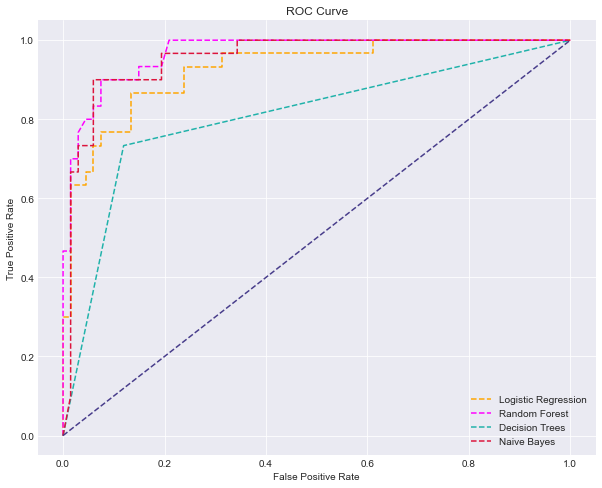

In [78]:
plt.style.use('seaborn-darkgrid') #make the chart look nicer than the default
plt.figure(figsize = (10, 8))

#LR:
plt.plot(lr_fpr, lr_tpr, linestyle = '--', color = 'orange', 
         label = 'Logistic Regression' )

#KNN:
#plt.plot(kn_fpr, kn_tpr, linestyle = '--', color = 'blue', 
#         label = 'K-Nearest Neighbors' )

#RF:
plt.plot(rf_fpr, rf_tpr, linestyle = '--', color = 'magenta', 
         label = 'Random Forest' )

#DT:
plt.plot(dt_fpr, dt_tpr, linestyle = '--', color = 'lightseagreen', 
         label = 'Decision Trees' )

#NB:
plt.plot(nb_fpr, nb_tpr, linestyle = '--', color = 'crimson', 
         label = 'Naive Bayes' )

#tpr = fpr:
plt.plot(rand_fpr, rand_tpr, linestyle = '--', color = 'darkslateblue')

#title
plt.title('ROC Curve')

#X label 
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc = 'best')

plt.show()


As seen in the figure (and reinforced by the AUC scores, which is the area under each of these curves), the Random Forest Classifier and the Naive Bayes classifier showed the best performances, with decision trees showing the worst performance (NOTE: for an unknown reason, upon re-running this notebook with no changes, the KNN models began throwing an error. Before the error occurred, it was showing the worst performance.)

### Principal Component Analysis vs. Original Logistic Regression 
From the above analysis, logistic regression wasn't the best model. In this section, I would like to see if PCA can improve the model performance. 

In [79]:
#import dependencies that haven't been imported yet: 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [80]:
df1 = df.copy()
y = df1['PCOS (Y/N)']
X = df1.drop(columns = ['PCOS (Y/N)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.18, random_state=42)

#First scale the data:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

#Apply PCA
pca = PCA(n_components = 7) 
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

#log regression: 
lr_pca = LogisticRegression(solver='lbfgs', max_iter= 1000, random_state = 42)
lr_pca.fit(X_train_pca, y_train)

lr_pca_pred = lr_pca.predict(X_test_pca)
lr_pca_acc = f1_score(lr_pca_pred, y_test)

lr_pca_acc

0.8571428571428571

In [81]:
#Create a function that gives a dictionary of the original log reg and pcas with different number of components
def pca_vs_original(X_train, X_test, y_train, y_test, max_components = 7, random_state = 42):
    lr_f1_dict = {}
    lr = LogisticRegression(solver='lbfgs', max_iter= 1000, random_state = random_state)
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_f1 = f1_score(lr_pred, y_test)
    lr_f1_dict[f'Original Log Reg \n F1 Score = {str(round(lr_f1, 3))}'] = round(lr_f1, 3)
    
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.fit_transform(X_test)
    
    for i in range(2, max_components + 1): # +1 so the total max components gets included
        pca = PCA(n_components = i)
        X_train_pca = pca.fit_transform(X_train_sc)
        X_test_pca = pca.transform(X_test_sc)
        lr_pca.fit(X_train_pca, y_train)
        lr_pca_pred = lr_pca.predict(X_test_pca)
        lr_pca_f1 = f1_score(lr_pca_pred, y_test)
        lr_f1_dict[f'PCA n_components = {str(i)} \n F1 Score = {str(round(lr_pca_f1, 3))}'] = round(lr_pca_f1, 3)
        
    return lr_f1_dict
        

In [82]:
lr_dict = pca_vs_original(X_train, X_test, y_train, y_test, max_components = 9)
lr_dict

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Original Log Reg \n F1 Score = 0.833': 0.833,
 'PCA n_components = 2 \n F1 Score = 0.746': 0.746,
 'PCA n_components = 3 \n F1 Score = 0.847': 0.847,
 'PCA n_components = 4 \n F1 Score = 0.833': 0.833,
 'PCA n_components = 5 \n F1 Score = 0.847': 0.847,
 'PCA n_components = 6 \n F1 Score = 0.862': 0.862,
 'PCA n_components = 7 \n F1 Score = 0.857': 0.857,
 'PCA n_components = 8 \n F1 Score = 0.821': 0.821,
 'PCA n_components = 9 \n F1 Score = 0.847': 0.847}

In [83]:
#Put it into a dataframe and visualize:
lr_series = pd.Series(lr_dict)
lr_series.index

Index(['Original Log Reg \n F1 Score = 0.833',
       'PCA n_components = 2 \n F1 Score = 0.746',
       'PCA n_components = 3 \n F1 Score = 0.847',
       'PCA n_components = 4 \n F1 Score = 0.833',
       'PCA n_components = 5 \n F1 Score = 0.847',
       'PCA n_components = 6 \n F1 Score = 0.862',
       'PCA n_components = 7 \n F1 Score = 0.857',
       'PCA n_components = 8 \n F1 Score = 0.821',
       'PCA n_components = 9 \n F1 Score = 0.847'],
      dtype='object')

[Text(0.5, 0, 'Log Regression Type'),
 Text(0, 0.5, 'F1 Scores'),
 Text(0.5, 1.0, 'Comparison of Logistic Regression Model With And WIthout PCA')]

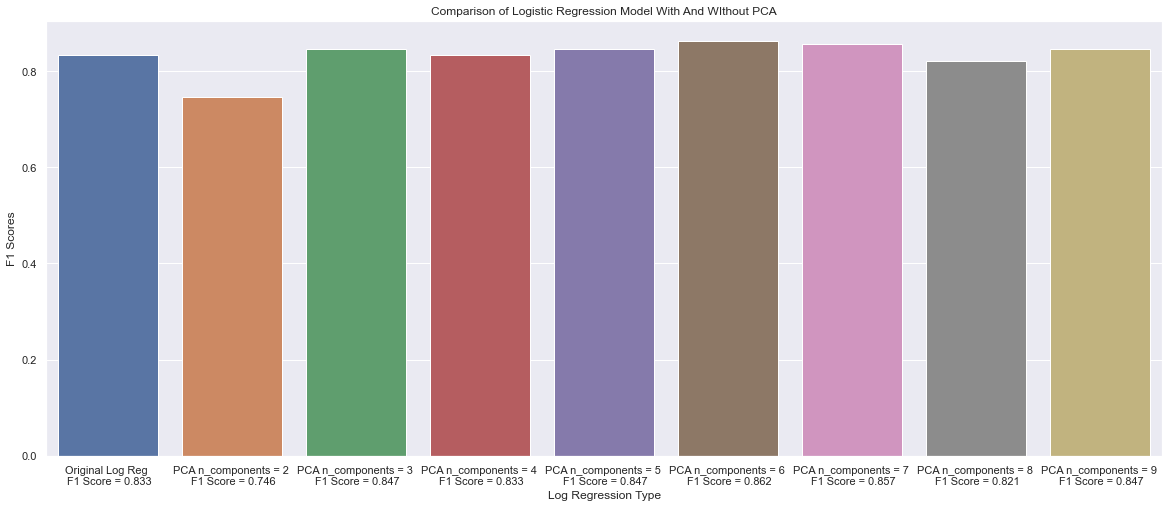

In [84]:
import seaborn as sns

sns.set(rc={"figure.figsize":(20, 8)})
comparison_bars = sns.barplot(x= list(lr_series.index), y= lr_series.values)
comparison_bars.set(xlabel ="Log Regression Type", ylabel = "F1 Scores", 
                    title ='Comparison of Logistic Regression Model With And WIthout PCA')


It looks like the original logistic regression model had a decent accuracy of 0.814. When applying PCA to the training and testing data, the accuracy dropped when using only 2 components. While adding components, there is a back-and-forth of slightly increading and slightly decreasing, with a peak increase to a score of 0.862. From this, I can gather that a logistic regression model that uses data that has been passed through PCA with 6 principal components will be the best to use in the case where I would have to predict if someone has PCOS, given their data that goes along with the features included in the dataset

Now I will compare the ROC curves of the original log regression and the model with the PCA data (6 components)

In [85]:
#recreate the PCA Logistic Regression with 6 Principal components, and get the predicted probs
N = 6
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

pca = PCA(n_components = N)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
lr_pca.fit(X_train_pca, y_train)
lr_pca_pred_prob = lr_pca.predict_proba(X_test_pca)
lr_pca_auc = roc_auc_score(y_test, lr_pca_pred_prob[:,1])

lr_pca_fpr, lr_pca_tpr, lr_pca_thresh = roc_curve(y_test, lr_pca_pred_prob[:, 1], pos_label = 1)



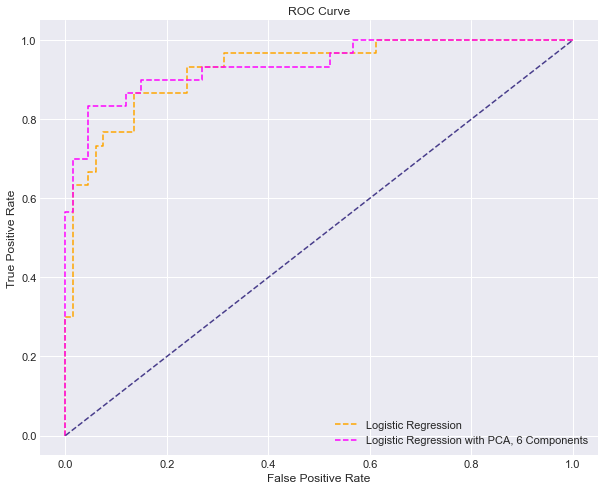

In [86]:
plt.style.use('seaborn-darkgrid') #make the chart look nicer than the default
plt.figure(figsize = (10, 8))

#LR:
plt.plot(lr_fpr, lr_tpr, linestyle = '--', color = 'orange', 
         label = 'Logistic Regression' )

#PCA
plt.plot(lr_pca_fpr, lr_pca_tpr, linestyle = '--', color = 'magenta', 
         label = 'Logistic Regression with PCA, 6 Components' )

#tpr = fpr:
plt.plot(rand_fpr, rand_tpr, linestyle = '--', color = 'darkslateblue')

#title
plt.title('ROC Curve')

#X label 
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc = 'best')

plt.show()

The above ROC Curves further verify that the logistic regression with PCA (6 principal components) is the best performing model, though the original logisitic regression model is not far behind. There may be more of a variance between the two models if there were more features in the data. 

### Would the classifiers change based on the features provided? 
In the above classifiers, I provided all of the features to use. However, in looking at the dataset, we can see that there are some features that are dependent on the others (example: FSH/LH ratio depends on LH and FSH values). 

To see if there are any changes with the classifiers given the information, I will use the dataset, but drop the features that are dependent on others (FSH/LH ratio, Waist Hop Ratio, etc)

In [87]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [88]:
df2 = df.copy() 
df2.drop(['FSH/LH', 'Waist:Hip Ratio'], axis = 1, inplace = True)
df2.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

Now that I don't have features that directly depend on others, I will do the same processes as before (comparing the classifiers, and perform PCA (if needed)

In [89]:
df3 = df2.copy()
y = df3['PCOS (Y/N)']
X = df3.drop(['PCOS (Y/N)'], axis = 1)

In [90]:
diff_test_size_dict_2 = {} 
testing_sizes = [0.1, 0.18, 0.2, 0.25, 0.33]
for size in testing_sizes: 
    clf = classifications(X, y, size, 5000)
    diff_test_size_dict_2[str(size * 100)] = clf
diff_test_size_dict_2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'10.0': {'Random Forest': 0.8823529411764706,
  'Decision Tree': 0.6875000000000001,
  'Naive Bayes': 0.8717948717948718,
  'Logistic Regression': 0.823529411764706},
 '18.0': {'Random Forest': 0.8727272727272728,
  'Decision Tree': 0.7096774193548386,
  'Naive Bayes': 0.7826086956521738,
  'Logistic Regression': 0.793103448275862},
 '20.0': {'Random Forest': 0.8000000000000002,
  'Decision Tree': 0.7368421052631577,
  'Naive Bayes': 0.7594936708860759,
  'Logistic Regression': 0.7692307692307693},
 '25.0': {'Random Forest': 0.7848101265822784,
  'Decision Tree': 0.7252747252747254,
  'Naive Bayes': 0.7272727272727274,
  'Logistic Regression': 0.7692307692307692},
 '33.0': {'Random Forest': 0.792079207920792,
  'Decision Tree': 0.6603773584905661,
  'Naive Bayes': 0.7187499999999999,
  'Logistic Regression': 0.7592592592592592}}

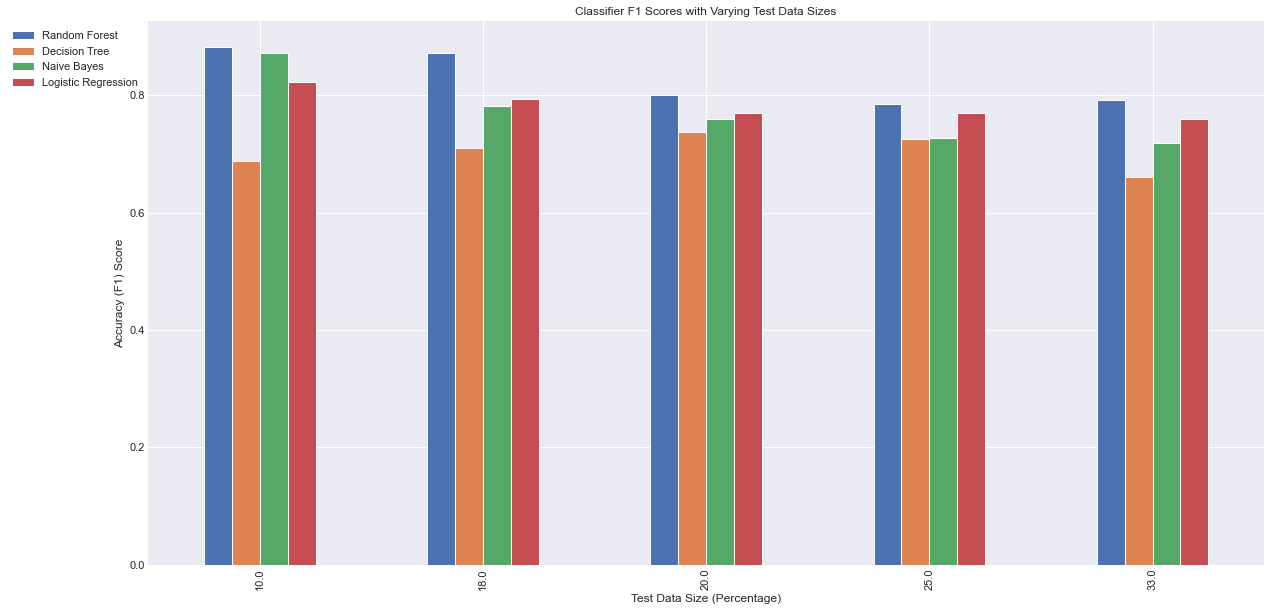

In [91]:
#compare the classifiers, visually: 
class_df = pd.DataFrame(diff_test_size_dict_2)
class_df_2 = class_df.transpose()
plt.style.use('seaborn-darkgrid')
class_df_2.plot(figsize = (20,10), kind = 'bar')
plt.title('Classifier F1 Scores with Varying Test Data Sizes')
plt.xlabel('Test Data Size (Percentage)')
plt.ylabel('Accuracy (F1) Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1) #gets the legend on the outside of the box
plt.show()

Overall, it looks like the .1 (10%) test size worked the best, though for the sake of potential overfitting, I will look at the 0.18 (18%), which is the second-best (which happened to be the optimal testing size in the original classifications earlier). <br> 

For reference, here are the values for our new classifiers with test size 0.18 (taken from the dictionary created): <br> 
18.0': {'Random Forest': 0.8727272727272728, <br>
  'Decision Tree': 0.7096774193548386, <br> 
  'Naive Bayes': 0.7826086956521738, <br> 
  'Logistic Regression': 0.793103448275862} <br> 
  
And these are the values of the original classifiers, with 0.18 test size (taken from the dicstionary created): <br> 
18.0': {'Random Forest': 0.8363636363636363, <br>
  'Decision Tree': 0.7333333333333333, <br>
  'Naive Bayes': 0.7733333333333334, <br>
  'Logistic Regression': 0.793103448275862}

For Random Forest, Decision Trees, and Naive Bayes, the accuracies did see a decline with the exclusion of the FSH/LH ratio and Waist/Hip ratio. Interestingly, however, Logistic Regression did not change. I will attempt to reinforce the model performances through AUC scores/ROC curves:

In [92]:
TEST_SIZE = 0.18 
rand_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size= TEST_SIZE, random_state=rand_state)
#logistic regression:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred_prob = lr_model.predict_proba(X_test)

#Random Forest:
rf_model = RandomForestClassifier(random_state = rand_state)
rf_model.fit(X_train, y_train)
rf_pred_prob = rf_model.predict_proba(X_test)

#Decision Tree:
dt_model = DecisionTreeClassifier(random_state = rand_state)
dt_model.fit(X_train, y_train)
dt_pred_prob = dt_model.predict_proba(X_test)

#Naive Bayes: 
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_prob = nb_model.predict_proba(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
lr_auc = roc_auc_score(y_test, lr_pred_prob[:,1])

#kn_auc = roc_auc_score(y_test, kn_pred_prob[:,1])

rf_auc = roc_auc_score(y_test, rf_pred_prob[:,1])

dt_auc = roc_auc_score(y_test, dt_pred_prob[:,1])

nb_auc = roc_auc_score(y_test, nb_pred_prob[:,1])

print(f"""Logistic Regression AUC Score: {str(lr_auc)}

Random Forest AUC Score: {str(rf_auc)}
Decision Tree AUC Score: {str(dt_auc)}
Naive Bayes AUC Score: {str(nb_auc)}""")

#KNN for some reason threw an error despite nothing being changes, so if I get it working again, input
#the following line into the print statement where there's a blank space: 
#K-Nearest Neighbors AUC Score: {str(kn_auc)}

Logistic Regression AUC Score: 0.9298507462686567

Random Forest AUC Score: 0.9679104477611941
Decision Tree AUC Score: 0.7920398009950249
Naive Bayes AUC Score: 0.9544776119402985


In [94]:
#Get the curves for the model, using roc_curve from sklearn.metrics:

#logistic regression:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_pred_prob[:, 1], pos_label = 1)

#KNN:
#kn_fpr, kn_tpr, kn_thresh = roc_curve(y_test, kn_pred_prob[:, 1], pos_label = 1)

#RF:
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, rf_pred_prob[:, 1], pos_label = 1)

#DT:
dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, dt_pred_prob[:, 1], pos_label = 1)

#NB:
nb_fpr, nb_tpr, nb_thresh = roc_curve(y_test, nb_pred_prob[:, 1], pos_label = 1)

#ROC Curve for tpr = fpr:
random_probs = [0 for i in range(len(y_test))]
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label = 1)



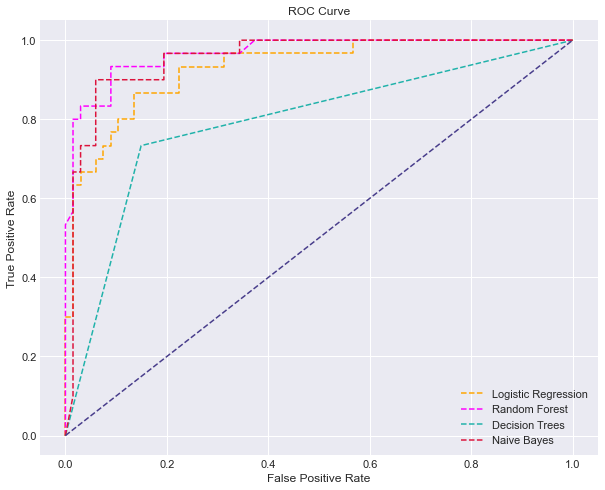

In [95]:
plt.style.use('seaborn-darkgrid') #make the chart look nicer than the default
plt.figure(figsize = (10, 8))

#LR:
plt.plot(lr_fpr, lr_tpr, linestyle = '--', color = 'orange', 
         label = 'Logistic Regression' )

#KNN:
#plt.plot(kn_fpr, kn_tpr, linestyle = '--', color = 'blue', 
#         label = 'K-Nearest Neighbors' )

#RF:
plt.plot(rf_fpr, rf_tpr, linestyle = '--', color = 'magenta', 
         label = 'Random Forest' )

#DT:
plt.plot(dt_fpr, dt_tpr, linestyle = '--', color = 'lightseagreen', 
         label = 'Decision Trees' )

#NB:
plt.plot(nb_fpr, nb_tpr, linestyle = '--', color = 'crimson', 
         label = 'Naive Bayes' )

#tpr = fpr:
plt.plot(rand_fpr, rand_tpr, linestyle = '--', color = 'darkslateblue')

#title
plt.title('ROC Curve')

#X label 
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc = 'best')

plt.show()


It appears that the models follow the same pattern of best-to-worst ranking as seen before. <br> 

#### Since the pattern is similar to the original classifers', which would be a better option for classification purposes? 
Technically, either could work fine. That being said, keeping the columns that were dropped (waist:hip ratio, FSH/LH) essentially contain redundant information, so it may be better practice to drop those columns, or, instead, drop the waist, hip, FSH, and LH columns, and keep the waist:hip ratio and FSH/LH columns. 

## Discussion
Before delving into the overall discussion of the findings in this notebook, I find it important to first address any pitfalls that may have affected the outcomes. The most significant of these is the amount of data provided in the dataset. The dataset used included 541 patients, which, while large for what the interest area (Kerala, India) is, classifiers would likely work better with more data. In addition to the sparsity of the data, the data included in the dataset was imbalanced, meaning that the amount of patients included with PCOS was different from the amount of patients included who did not have PCOS. This can also affect the outcome of the classifiers, because classifiers overall tend to be biased towards the majority class. Imbalanced data also can affect the correlation between features, which is why we may not have seen many strong correlations between features, though according to the mechanisms of actions of the hormones discussed in detail, there likely should have been. To improve the quality of the outcome and analysis, I would suggest collecting more data, trying to balance the amount of those with PCOS and those without PCOS, or collect more data and then filter the majority class to be equal to that of the minority to achieve balance.

As shown in this notebook, Polycystic Ovarian Syndrome can be predicted using different hormone levels, body features, and lifestyle choices. __Why does this matter to a company that is attempting to create an all-in-one supplement/medication that can relieve PCOS symptoms?__ <br> 
When looking into what can potentially affect PCOS, creating and comparing classifiers may be a helpful option. We can pick and choose which features to include in the classifiers, and see how they affect the ability to predict whether the patients have PCOS or not. If there is a large drop in accuracy when a feature is dropped, we can assume that the feature does have a significant relationship with PCOS. As a continuation of the above work, if I were to continue, I would choose to create a Random Forest Classifier to do the comparisions mentioned, as it had the overall best accuracy output. 
<br> 


## What is it like LIVING with PCOS? 
In this notebook, I was able to analyze the hormones provided in the dataset, and build and compare multiple classifiers that can determine if someone has PCOS or not. <br>

While I have looked at the biological effects of PCOS, what about effects of PCOS itself on those who have it? What is the experience of living with PCOS like? This will be covered in the notebook "PCOS Experience," where I will look into the submissions on the PCOS-related subreddits, utilizing the PRAW API (Reddit's official API). While looking into the subreddits' submissions, I will focus on what a company attempting to create an all-in-one supplement to relieve PCOS symptoms should focus on in their development of the product. 